In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Dataset Loading

In [2]:
df=pd.read_csv('heart_cleveland_upload.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


# Checking for null Values

In [6]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

## Checking for Imbalanced data
There should not be 80% data of one class label and 20% of other

In [7]:
df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

## Data Exploration Throught Plotting

In [8]:
# Finding Correlation
correlation=df.corr()

In [9]:
correlation['condition'].sort_values(ascending=False)


condition    1.000000
thal         0.520516
ca           0.463189
oldpeak      0.424052
exang        0.421355
cp           0.408945
slope        0.333049
sex          0.278467
age          0.227075
restecg      0.166343
trestbps     0.153490
chol         0.080285
fbs          0.003167
thalach     -0.423817
Name: condition, dtype: float64

<AxesSubplot: xlabel='thal', ylabel='count'>

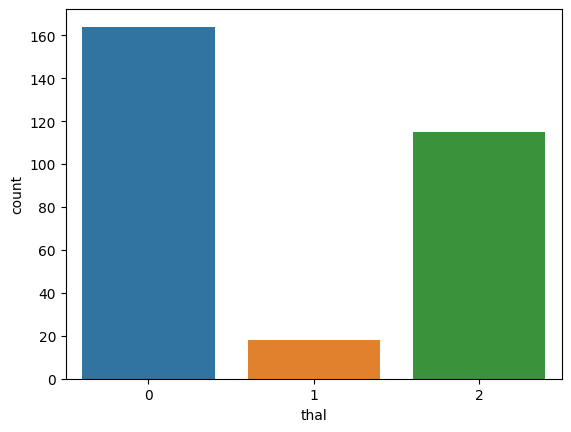

In [10]:
sns.countplot(x=df['thal'])

C:\Users\PRITESH\AppData\Local\Temp\ipykernel_21792\2304938535.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['thalach'])


<AxesSubplot: ylabel='Density'>

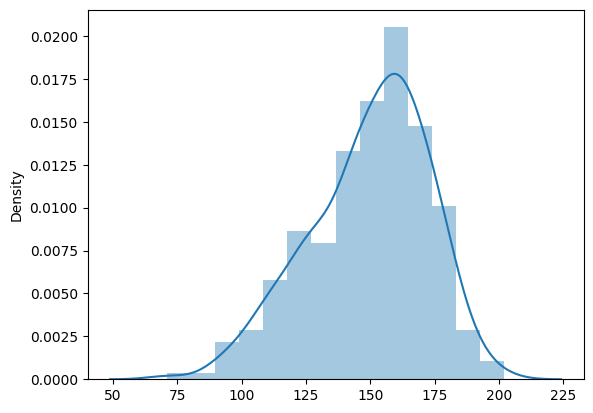

In [11]:
sns.distplot(x=df['thalach'])

## Splliting

In [12]:
x=df.drop(['condition'],axis=1)

In [13]:
y=df['condition']

In [14]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

## Model Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model=LogisticRegression(random_state=42)

In [19]:
model.fit(x_train,y_train)

C:\Users\PRITESH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [20]:
test=model.predict(x_test)

In [21]:
y_test

295    0
215    0
66     0
77     0
53     0
249    0
28     1
188    0
126    1
141    0
224    1
121    0
29     0
167    1
103    1
292    1
10     1
20     0
100    1
294    1
95     0
191    0
267    1
150    0
273    1
272    0
137    0
247    1
1      0
192    1
83     0
270    1
242    1
284    0
73     0
208    1
116    0
217    1
135    0
244    1
68     0
228    1
3      1
202    1
101    0
64     0
274    1
117    0
281    1
131    0
156    0
200    1
140    0
30     0
236    1
264    1
205    1
70     0
287    0
260    1
Name: condition, dtype: int64

In [22]:
# Evaluation of model

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accu=accuracy_score(test,y_test)

In [25]:
accu

0.9

In [26]:
train=model.predict(x_train)

In [27]:
accutrain=accuracy_score(train,y_train)

In [28]:
accutrain

0.8523206751054853

# Prediction

In [29]:
input_data=(69,1,0,160,234,1,2,131,0,0.1,3,2,0)
input=np.asarray(input_data)

In [30]:
input

array([6.90e+01, 1.00e+00, 0.00e+00, 1.60e+02, 2.34e+02, 1.00e+00,
       2.00e+00, 1.31e+02, 0.00e+00, 1.00e-01, 3.00e+00, 2.00e+00,
       0.00e+00])

In [31]:
input=input.reshape(1,-1)

In [32]:
input

array([[6.90e+01, 1.00e+00, 0.00e+00, 1.60e+02, 2.34e+02, 1.00e+00,
        2.00e+00, 1.31e+02, 0.00e+00, 1.00e-01, 3.00e+00, 2.00e+00,
        0.00e+00]])

In [33]:
model.predict(input)

C:\Users\PRITESH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)